# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [1]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [2]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [3]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [4]:
np.linalg.norm(BB)

0.3643616198301534

### Do the Jacobi iteration

In [5]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [6]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  1.11022302e-16,  0.00000000e+00, -1.11022302e-16,
        0.00000000e+00,  0.00000000e+00, -2.08166817e-17, -1.11022302e-16,
        0.00000000e+00,  2.22044605e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [7]:
# ... ENTER YOUR CODE HERE ...
def Jacobi_iteration(A, b, eps=1e-12, maxiter=50): 
    diag_1d = np.diag(A)
    
    B = -A.copy()
    np.fill_diagonal(B, 0)
    invD = np.diag(1.0 / diag_1d)
    
    BB = invD @ B 
    c = invD @ b 
    
    pre_x = np.ones(n)
    for i in range(maxiter): 
        x = BB @ pre_x + c 
        
        if np.linalg.norm(pre_x - x) < eps: 
            break
        
        pre_x = x
    
    return x 

In [8]:
x = Jacobi_iteration(A, b)

np.testing.assert_allclose(A @ xx, b)
np.testing.assert_allclose(xx, x)

In [9]:
def calc_norm(A): 
    diag_1d = np.diag(A)
    
    B = -A.copy()
    np.fill_diagonal(B, 0)
    invD = np.diag(1.0 / diag_1d)
    
    BB = invD @ B
    
    return np.linalg.norm(BB)

In [10]:
#record = [] 
for k in range(25): 
    A1 = A + np.diagflat([-k] * n)
    B_norm = calc_norm(A1)
    x = Jacobi_iteration(A1, b)
    
    xx = np.linalg.solve(A1, b)
    dist = np.linalg.norm(x - xx)
    # record.append(dist)
    
    print(A1[0, 0], '\t', B_norm, '\t', dist)

15.191519450378893 	 0.3643616198301534 	 8.016629190714786e-14
14.191519450378893 	 0.38959181027260875 	 1.460552645800977e-13
13.191519450378893 	 0.4185783948614869 	 1.1983977267600476e-13
12.191519450378893 	 0.4522284025473819 	 1.5550189398045518e-13
11.191519450378893 	 0.4917667095178099 	 1.3761742991573544e-13
10.191519450378893 	 0.5388887887486234 	 2.670299522243857e-13
9.191519450378893 	 0.5960110344093967 	 3.1111096720488395e-13
8.191519450378893 	 0.6667001660296401 	 2.7708305389622986e-13
7.191519450378893 	 0.7564517359241751 	 1.4990529280955456e-10
6.191519450378893 	 0.8742017351588475 	 2.016159609310716e-07
5.191519450378893 	 1.0355299928250667 	 0.0009191717405677627
4.191519450378893 	 1.2702850939751231 	 23.481633679539154
3.191519450378893 	 1.6439565658213244 	 8260242.793633643
2.191519450378893 	 2.3348091117608556 	 261149802433164.78
1.1915194503788928 	 4.080768845910033 	 1.3716691464130676e+26
0.19151945037889284 	 30.71532760306489 	 1.7398635

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

In [11]:
from copy import copy 

In [12]:
# ... ENTER YOUR CODE HERE ...
def Seidel_iteration(A, b, eps=1e-15, maxiter=100): 
    m, n = A.shape 
    x, x0 = np.zeros(n), np.ones(n)
    
    for i in range(maxiter): 
        for j in range(n): 
            temp = np.matmul(A[j, :], x0) - A[j, j] * x0[j]
            x[j] = (b[j] - temp) / A[j, j]
            
        if np.linalg.norm(x - x0, ord=2) < eps: 
            break
        
        x0 = copy(x)
        
    return x 

In [13]:
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

xx = np.linalg.solve(A, b)

In [14]:
x = Seidel_iteration(A, b)

In [15]:
np.testing.assert_allclose(x, xx)
np.testing.assert_allclose(A @ x, b)

In [16]:
for k in range(25): 
    A1 = A + np.diagflat([-k] * n)
    B_norm = calc_norm(A1)
    x = Seidel_iteration(A1, b)
    
    xx = np.linalg.solve(A1, b)
    dist = np.linalg.norm(x - xx)
    # record.append(dist)
    
    print(A1[0, 0], '\t', B_norm, '\t', dist)

15.325707414425347 	 0.3679761958864619 	 1.717113384210645e-16
14.325707414425347 	 0.39315162237575607 	 1.253240166917531e-16
13.325707414425347 	 0.42202631543251723 	 1.6647019655304507e-16
12.325707414425347 	 0.45548069473587693 	 1.2558487442844619e-16
11.325707414425347 	 0.4946988077730063 	 1.8006062009096791e-16
10.325707414425347 	 0.541311664415742 	 2.678280467609959e-16
9.325707414425347 	 0.5976303078076515 	 2.790101973140761e-16
8.325707414425347 	 0.6670418762840838 	 3.091949950422155e-16
7.325707414425347 	 0.7547193781175311 	 3.3448078079445316e-16
6.325707414425347 	 0.8689797529637481 	 2.0340476058074165e-15
5.325707414425347 	 1.0241070526789309 	 2.739548834490962e-08
4.325707414425347 	 1.2468971279649803 	 9.407045842618816
3.325707414425347 	 1.5943014624467677 	 416594156613.1983
2.325707414425347 	 2.213124726732211 	 6.15502814590454e+25
1.325707414425347 	 3.6414476395758366 	 1.3266076300191454e+47
0.3257074144253469 	 11.669681525331226 	 8.4257423

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [18]:
# ... ENTER YOUR CODE HERE ...
def minimum_iteration(A, b, show_plot=True, eps=1e-12, maxiter=100):
    m, n = A.shape 
    x0 = np.ones(n)
    tau_series = []
    
    for i in range(maxiter): 
        r = np.matmul(A, x0) - b
        temp = np.matmul(A, r)
        tau = np.matmul(r, temp) / np.linalg.norm(temp, ord=2)**2
        tau_series.append(tau)
        x = x0 - tau * r
        
        if np.linalg.norm(x - x0) < eps: 
            break
        
        x0 = x
    
    if show_plot: 
        plt.plot(np.arange(len(tau_series)), np.array(tau_series), 'o--')
        plt.xlabel('iteration times')
        plt.ylabel('tau')
    
    return x

In [19]:
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

xx = np.linalg.solve(A, b)

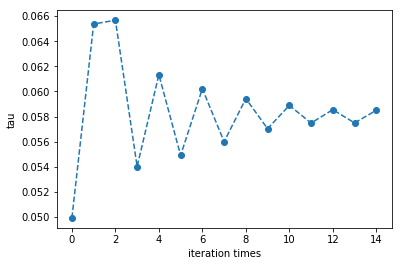

In [20]:
x = minimum_iteration(A, b)

In [21]:
np.testing.assert_allclose(x, xx)
np.testing.assert_allclose(A @ x, b)

In [22]:
for k in range(25): 
    A1 = A + np.diagflat([-k] * n)
    B_norm = calc_norm(A1)
    x = minimum_iteration(A1, b, False)
    
    xx = np.linalg.solve(A1, b)
    dist = np.linalg.norm(x - xx)
    # record.append(dist)
    
    print(A1[0, 0], '\t', B_norm, '\t', dist)

15.373423707353538 	 0.33688318691473734 	 8.14563061388198e-14
14.373423707353538 	 0.35991861870451014 	 3.4551341132243973e-14
13.373423707353538 	 0.38633818171402223 	 1.0020257702217684e-13
12.373423707353538 	 0.41694750327373403 	 6.195482662263055e-14
11.373423707353538 	 0.45283028862683194 	 5.4332700689448806e-14
10.373423707353538 	 0.49547981843737987 	 5.956477210470438e-14
9.373423707353538 	 0.5470130066640051 	 9.59724131234205e-14
8.373423707353538 	 0.6105347157974735 	 2.0291423092250298e-13
7.373423707353538 	 0.6907921005349461 	 1.9476380518101547e-13
6.373423707353538 	 0.7954308152405096 	 3.645063994142921e-13
5.373423707353538 	 0.9376202762223229 	 2.4198735564806606e-13
4.373423707353538 	 1.1421938096062156 	 4.1814781402732593e-13
3.3734237073535382 	 1.462477199852301 	 8.966224656129397e-13
2.3734237073535382 	 2.039321827238908 	 1.8594419406457233e-12
1.3734237073535382 	 3.4341680304660547 	 7.561876083359e-07
0.37342370735353825 	 47.4832412493988 